# Двуслойная нейронная сеть

In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from keras.utils import to_categorical
from keras import models
from keras import layers

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_diff(y):
    return y*(1 - y)

def ReLU(x):
    return np.where(x>0, x, np.zeros(x.shape))

def ReLU_diff(x):
    return np.where(x>0, np.ones(x.shape), np.zeros(x.shape))



$$U = U_{1,s} = \left( u_1,\ u_2,\dots,u_k\right)  = \left( \dots u_i\dots\right)_{1\times s} $$
$$V = V_{s,k} = 
\left(
  \begin{array}{ccc}
  v_{11} & \cdots & v_{1k} \\
  v_{21} & \cdots & v_{2k} \\
  \cdots & \cdots & \cdots \\
  v_{s1} & \cdots & v_{sk} \\
  \end{array}
  \right) = 
\left(
  \begin{array}{ccc}
  \cdots & \cdots & \cdots \\
  \cdots & v_{ij} & \cdots \\
  \cdots & \cdots & \cdots \\
  \end{array}
  \right)_{s\times k}
   $$

$$W = W_{k,n} = 
\left(
  \begin{array}{ccc}
  w_{11} & \cdots & w_{1n} \\
  w_{21} & \cdots & w_{2n} \\
  \cdots & \cdots & \cdots \\
  w_{k1} & \cdots & w_{kn} \\
  \end{array}
  \right) = 
\left(
  \begin{array}{ccc}
  \cdots & \cdots & \cdots \\
  \cdots & w_{ij} & \cdots \\
  \cdots & \cdots & \cdots \\
  \end{array}
  \right)_{k\times n}
   $$

$$X = X_{n,m} = 
\left(
  \begin{array}{ccc}
  x_{11} & \cdots & x_{1n} \\
  x_{21} & \cdots & x_{2n} \\
  \cdots & \cdots & \cdots \\
  x_{n1} & \cdots & x_{nm} \\
  \end{array}
  \right) = 
\left(
  \begin{array}{ccc}
  \cdots & \cdots & \cdots \\
  \cdots & x_{ij} & \cdots \\
  \cdots & \cdots & \cdots \\
  \end{array}
  \right)_{n\times m}
   $$

$$ X_{i} = 
\left(
  \begin{array}{c}
   x_{1i} \\
   x_{2i} \\
   \cdots \\
   x_{ni} \\
  \end{array}
  \right) 
   $$

 $$ B = B_{k,1} = 
\left(
  \begin{array}{c}
   b_{1} \\
   b_{2} \\
   \cdots \\
   b_{k} \\
  \end{array}
  \right) 
   $$ 

 $$ C = C_{s,1} = 
\left(
  \begin{array}{c}
   c_{1} \\
   c_{2} \\
   \cdots \\
   c_{s} \\
  \end{array}
  \right) 
   $$ 


$$\phi(W\cdot X+B)=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & \phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$

$$V\cdot\phi(W\cdot X+B)=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & \sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$

$$V\cdot\phi(W\cdot X+B) + C=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & \sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r  & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$

$$\psi (V\cdot\phi(W\cdot X+B) + C)=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & \psi\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right)  & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$

$$U\psi (V\cdot\phi(W\cdot X+B) + C)=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & u_r\psi\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right)  & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$

$$NN(X) = U\psi (V\cdot\phi(W\cdot X+B) + C) + d=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & u_r\psi\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right) + d  & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$


$$L(X_p) = \sum\limits_{p=1}^{m}(y_p-NN(X_p))^2 $$

$$ \dfrac{\partial L}{\partial u_{r}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))  \psi\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right) $$


$$ \dfrac{\partial L}{\partial v_{ri}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))  u_r\psi'\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right)\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) $$


$$ \dfrac{\partial L}{\partial w_{il}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))  u_r\psi'\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right)v_{ri}\phi'\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right)x_{lp}$$

$$ \dfrac{\partial L}{\partial c_{r}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))  u_r\psi'\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right) $$

$$ \dfrac{\partial L}{\partial b_{i}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))  u_r\psi'\left(\sum\limits_{i=1}^{k}v_{ri}\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +c_r\right)v_{ri}\phi'\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right)$$

$$ \dfrac{\partial L}{\partial d}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))$$

$$ \dfrac{\partial L}{\partial U_{1,s}}= -2 (Y_{1,m} - NN(X_{n,m})) \cdot  \psi (V_{s,k}\cdot\phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) + C_{s,1}) ^{\tau}$$

$$ \dfrac{\partial L}{\partial V_{s,k}}= -2U_{1,s} ^{\tau}(( (Y_{1,m} - NN(X_{n,m}))   \psi' (V_{s,k}\cdot\phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) + C_{s,1}))\cdot\phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) ^{\tau})$$


$$ \dfrac{\partial L}{\partial W_{k,n}}=  -2(((U_{1,s}V_{s,k}^{\tau}) \cdot ( (Y_{1,m} - NN(X_{n,m}))   \psi' (V_{s,k}\cdot\phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) + C_{s,1}) ))\phi'(W_{k,n}\cdot X_{n,m} + B_{k,1})))\cdot X_{n,m} ^{\tau}$$

$$ \dfrac{\partial L}{\partial B_{k,1}}=   -2(((U_{1,s}V_{s,k}^{\tau}) \cdot (    \psi' (V_{s,k}\cdot\phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) + C_{s,1}) ))\phi'(W_{k,n}\cdot X_{n,m} + B_{k,1})))\cdot (Y_{1,m} - NN(X_{n,m})) ^{\tau}$$

$$ \dfrac{\partial L}{\partial C_{s,1}}=  -2U_{1,s}^{\tau}  (\psi' (V_{s,k}\cdot\phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) + C_{s,1})\cdot ((Y_{1,m} - NN(X_{n,m}))^{\tau} )  $$



In [15]:
class NeuralNetwork_two:
    def __init__(self, x, y): #  объём датасета
        self.input      = x 
        self.y          = y 
        self.diam_1     = 3
        self.diam_2     = 4 
        self.weights1   = np.random.rand(self.diam_1, self.input.shape[0]) 
        self.weights2   = np.random.rand(self.diam_2, self.diam_1) 
        self.weights3   = np.random.rand(1, self.diam_2) # 
        self.output     = np.zeros(self.y.shape) 
        self.alpha      = 1
        self.bias_1     = np.random.rand(self.diam_1, 1)
        self.bias_2     = np.random.rand(self.diam_2, 1)
        self.b          = np.random.rand()

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.weights1, self.input) + self.bias_1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.bias_2)
        self.output = np.dot(self.weights3, self.layer2) + self.b #

    def backprop(self):
        d_weights3 = 2*np.dot((self.y - self.output),self.layer2.T)
        d_weights2 = 2*self.weights3.T*np.dot((self.y - self.output)*sigmoid_diff(self.layer2),self.layer1.T )

        d_weights1 = 2*np.dot(np.dot(self.weights3*self.weights2.T,(self.y - self.output)*sigmoid_diff(self.layer2))*sigmoid_diff(self.layer1),self.input.T)

        d_bias_2   = 2*self.weights3.T*np.dot(sigmoid_diff(self.layer2), (self.y - self.output).T)
        d_bias_1   = 2*np.dot(np.dot(self.weights3*self.weights2.T,sigmoid_diff(self.layer2)*sigmoid_diff(self.layer1)), (self.y - self.output).T)
        d_b        = 2*(self.y - self.output).sum()


        self.weights1 += self.alpha * d_weights1/self.input.shape[1]
        self.weights2 += self.alpha * d_weights2/self.input.shape[1]
        self.weights3 += self.alpha * d_weights3/self.input.shape[1]
        self.bias_1     += self.alpha * d_bias_1/self.input.shape[1]
        self.bias_2     += self.alpha * d_bias_2/self.input.shape[1]
        self.b        += self.alpha * d_b/self.input.shape[1]

    def test(self, t):
        return np.dot(self.weights3, sigmoid(np.dot(self.weights2, sigmoid(np.dot(self.weights1, t) + self.bias_1)) + self.bias_2)) + self.b

$$NN(X) = U\sigma (V\cdot\sigma
(W\cdot X+B) + C) + d
   $$

In [16]:
def sn(x,y):
    return (np.sin(y/6)/(1 + x**2/10) + 1)/2

In [17]:
dim_x = 100
#XY = np.random.uniform(-20, 20, 2*dim_x)
#XY.shape = (2,dim_x)
#X1 , Y1 = XY
X = np.arange(-20, 20, 1)
Y = np.arange(-20, 20, 1)
X, Y = np.meshgrid(X, Y)
X1, Y1 = X.ravel(), Y.ravel()
Z1 = (np.sin(Y1/6)/(1 + X1**2/10) + 1)/2

In [18]:
Xd = np.array([X1,Y1])
Xd.shape

(2, 1600)

In [19]:
Zd = np.array([list(Z1)])
Zd.shape

(1, 1600)

In [20]:
z = NeuralNetwork_two(Xd,Zd)

In [21]:
z.alpha /= 100

In [22]:
for i in range(100000):
    z.feedforward()
    z.backprop()

ValueError: operands could not be broadcast together with shapes (4,1600) (3,1600) 

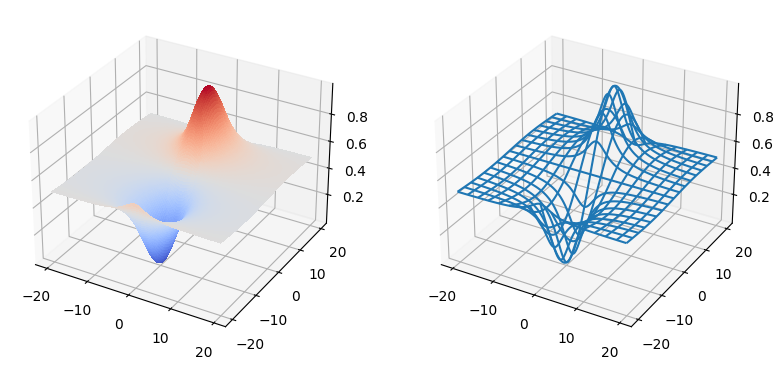

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (np.sin(Y/6)/(1 + X**2/10) + 1)/2
#X, Y, Z = get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)


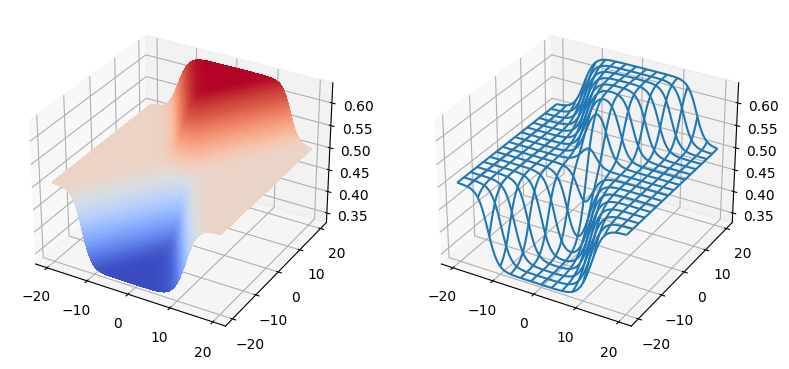

In [ ]:
fig_2 = plt.figure(figsize=plt.figaspect(0.5))

ax_2 = fig_2.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20.25, 0.25)
Y = np.arange(-20, 20.25, 0.25)
X, Y = np.meshgrid(X, Y)

Z = z.test(np.array([X.ravel(),Y.ravel()])).reshape((161,161))

ax_2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax_2 = fig_2.add_subplot(1, 2, 2, projection='3d')

ax_2.plot_wireframe(X, Y, Z, rstride=10, cstride=10)